<a href="https://colab.research.google.com/github/HwangHanJae/ml-definitive-guide-pratice/blob/main/classification/random_forest_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 랜덤 포레스트(Random Forest)
### : 결정 트리 기반 알고리즘으로 배깅(Bagging)의 대표적인 알고리즘
- 앙상블 알고리즘 중 비교적 빠른 수행 속도를 가지고 있음
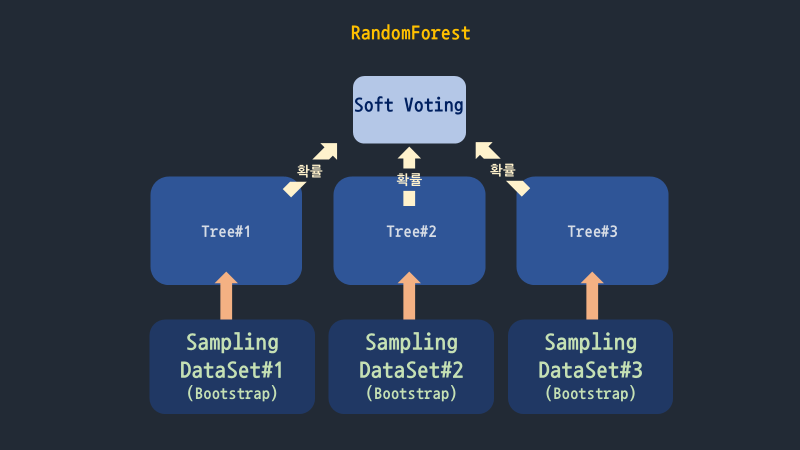

- 부트스트래핑(bootstrapping) : 여러 개의 데이터 세트를 중첩되게 분리하는 것
  - 부트스트랩은 통계학에서 여러개의 작은 데이터 세트를 임의적으로 만들어 개별 평균의 분포도를 측정하는 등의 목적을 위한 샘플링 방식

## 랜덤 포레스트 실습
- 사용자 행동 인식 예측 데이터 세트를 활용
  - 예전에 만들었던 get_human_dataset()를 활용하겠음

In [1]:
import pandas as pd
### features.txt 파일에 있는 컬럼명을 입력 받아서 중복된 컬럼명은 원본 컬럼명+_1, _2와 같이 중복된 차수를 원본 컬럼명에 더해서 컬럼명을 update 하는 함수임. . 
def get_new_feature_name_df(old_feature_name_df):
    #column_name으로 중복된 컬럼명에 대해서는 중복 차수 부여, col1, col1과 같이 2개의 중복 컬럼이 있을 경우 1, 2 
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    # feature_dup_df의 index인 column_name을 reset_index()를 이용하여 컬럼으로 변환. 
    feature_dup_df = feature_dup_df.reset_index()
    # 인자로 받은 features_txt의 컬럼명 DataFrame과 feature_dup_df를 조인. 
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    # 새로운 컬럼명은 앞에 중복 차수를 접미어로 결합. 
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                           if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [2]:
def get_human_dataset():
 
  file_path = "/content/drive/MyDrive/Colab Notebooks/DataScience/Data/uci_humal_activity/features.txt"
  #각 데이터 파일들은 공백으로 구분되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
  feature_name_df = pd.read_csv(file_path, sep='\s+', header=None, names=["column_index", "column_name"])
  

 #중복된 feature명을 새롭게 수정하는 get_new_feature_name_df()를 이용하여 새로운 feature명 DataFrame생성. 
  new_feature_name_df = get_new_feature_name_df(feature_name_df)
  #DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 반환
  feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

  #학습 피처 데이터 세트(X_train) / 테스트 피처 데이터 세트(X_test)를 DataFrame으로 로딩
  #칼럼명은 feature_name을 사용
  X_train_path = "/content/drive/MyDrive/Colab Notebooks/DataScience/Data/uci_humal_activity/train/X_train.txt"
  X_test_path = "/content/drive/MyDrive/Colab Notebooks/DataScience/Data/uci_humal_activity/test/X_test.txt"
  X_train = pd.read_csv(X_train_path, sep='\s+',names = feature_name)
  X_test = pd.read_csv(X_test_path, sep='\s+',names = feature_name)

  #학습 레이블 데이터(y_train) / 테스트 레이블 데이트(y_test)를 DataFrame으로 로딩
  #칼럼명은 action으로 사용
  y_train_path = "/content/drive/MyDrive/Colab Notebooks/DataScience/Data/uci_humal_activity/train/y_train.txt"
  y_test_path = "/content/drive/MyDrive/Colab Notebooks/DataScience/Data/uci_humal_activity/test/y_test.txt"
  y_train = pd.read_csv(y_train_path, sep='\s+', header = None, names=["action"])
  y_test = pd.read_csv(y_test_path, sep='\s+', header = None, names=["action"])

  #로드된 학습/테스트용 DataFrame 모두 반환
  return X_train, X_test, y_train, y_test

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#get_human_dataset()을 사용하여 학습/데이터용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

#랜덤 포레스트 핟습 및 별도의 테스트 세트로 예측 성능 평가
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(f"랜덤 포레스트 정확도 : {round(accuracy, 4)}")

랜덤 포레스트 정확도 : 0.9253


기본 랜덤 포레스트 모델은 약 92%의 정확도를 보여줍니다.

## 랜덤포레스트 하이퍼 파라미터 튜닝
- 하이퍼 파라미터는 결정트리에서 사용되는 하이퍼 파라미터와 같은 파라미터가 대부분이다.

### 파라미터(Parameters)
- n_estimators
  - 랜덤포레스트에서 결정 트리의 개수를 지정
  - defalut = 10개로 많이 설정할수록 좋은 성능을 기대할 수 있지만 계속 증가한다 하여 성능이 무조건 향상되는 것은 아님
    - 개수가 증가할 수록 학습 수행 시간도 증가함
- max_features
  - 최적의 분할을 위해 고려한 최대 피처 개수
  - default = 'auto' 즉 'sqrt'와 같음
    - 랜덤 포레스트의 트리를 분할 하는 피처를 참조할 때 전체 피처가 아닌 sqrt(전체 피처 개수) 만큼 참조함
      - 전체 피처가 16개라면 분할을 위해 4개 참조
- max_depth, max_samples_split
  - 과적합을 제어하는데 사용

In [6]:
#GridSearchCV를 이용해 튜닝(n_jobs=-1 파라미터를 지정해 모든 CPU 코어를 사용)
from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators" : [100],
    "max_depth" : [6, 8, 10, 12],
    "min_samples_leaf" : [8, 12, 18],
    "min_samples_split" : [8, 16, 20]
}
clf = RandomForestClassifier(random_state= 0 , n_jobs= -1)
grid = GridSearchCV(estimator=clf, param_grid=params, cv=2, n_jobs=-1)
grid.fit(X_train, y_train)
print("최적 하이퍼 파라미터\n", grid.best_params_)
print("최고 예측 정확도 : {}".format(round(grid.best_score_, 4)))

최적 하이퍼 파라미터
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도 : 0.918


정확도는 약 91%정도 측정되었음  
파라미터는 n_estimators = 300으로 바꾸고 나머지는 그대로 두고 학습을 시킨 후에 예측 성능을 측정

In [8]:
clf = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, min_samples_split=8, n_jobs=-1, random_state=0)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print("예측 정확도 : {}".format(round(accuracy_score(y_test, pred), 4)))

예측 정확도 : 0.9165


### 피처의 중요도 확인

In [9]:
def plt_feature_importance_top20(model,columns ):
  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns
  feature_importance = model.feature_importances_
  feature_importance = pd.Series(feature_importance, index=columns)
  top20 = feature_importance.sort_values(ascending=False)[:20]

  plt.figure(figsize=(10,8))
  plt.title("Feature Importances Top 20")
  sns.barplot(x=top20, y=top20.index)
  plt.show()

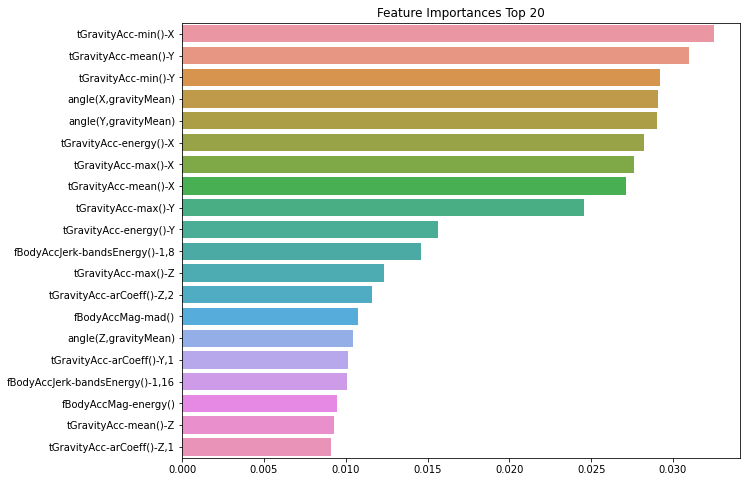

In [10]:
plt_feature_importance_top20(clf, X_train.columns)